# EngDeu Neural Machine Translation Project Notebook
_July 2025_

### Package Imports

In [43]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Tuple, Optional, Union

### Visualize Traning Curves

In [49]:
def read_training_history(model_name: str, src_lang: str, tgt_lang: str) -> Tuple[pd.Series]:
    """
    Helper function for reading in the training history for a given model.
    Returns the in-sample perplexity of the model logged while training and also the
    validation set perplexity of the model logged while training as a tuple of pd.Series.
    
    :param model_name: Name of the input model e.g. LSTM_Att.
    :param: src_lang: The source language i.e. either 'eng' or 'deu'.
    :param: tgt_lang: The target language i.e. either 'eng' or 'deu'.
    :returns: A tuple of perplexity scores obtained during training.
    """
    save_dir = f"saved_models/{model_name}/{src_lang.capitalize()}{tgt_lang.capitalize()}"
    training_hist = pd.read_csv(os.path.join(save_dir, "training_ppl.csv"), index_col=0).iloc[:, 0]
    validation_hist = pd.read_csv(os.path.join(save_dir, "validation_ppl.csv"), index_col=0).iloc[:, 0]
    return training_hist, validation_hist

In [50]:
def plot_training_history(model_name: str, training_hist: pd.Series, validation_hist: pd.Series, ax=None) -> None:
    """
    Helper function for plotting the training history for a given model. Plots the in-sample and
    validation set log perplexity values vs training iteration.
    
    :param model_name: Name of the input model e.g. LSTM_Att, used for display in the title.
    :param training_hist: A pd.Series of in-sample perplexity values from the model during training
        with the train iteration recorded as the index.
    :param validation_hist: A pd.Series of validation set perplexity values from the model during 
        training with the train iteration recorded as the index.
    :param ax: An optional plotting axis which can be provided to specify where the make the plot.
    :returns: None, plots the training history.
    """
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(7, 4))
    ax.plot(training_hist, label="Training")
    ax.plot(validation_hist, label="Validation")
    ax.set_yscale("log")
    ax.set_title(f"{model_name} Training History")
    ax.set_ylabel("log(perplexity)");ax.set_xlabel("Training Iteration")
    ax.grid(color="lightgray", zorder=-3)
    ax.legend()

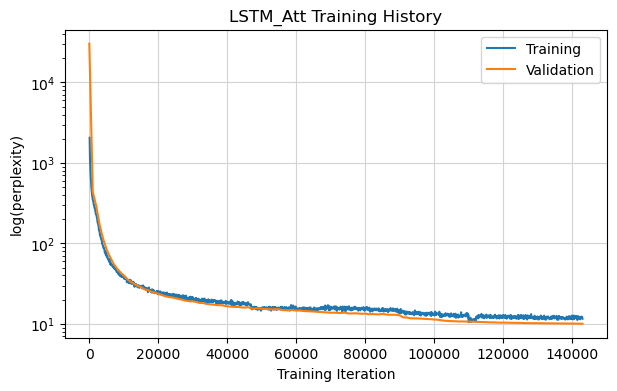

In [51]:
model_name = "LSTM_Att"
plot_training_history(model_name, *read_training_history(model_name, "deu", "eng"))